In [3]:
%cd ..

d:\project\shelv_monitoring\shelv_monitoring


In [4]:
pwd

'd:\\project\\shelv_monitoring\\shelv_monitoring'

In [ ]:
# %cd shelv_monitoring  

d:\project\shelv_monitoring\shelv_monitoring


In [10]:
pip install -U ultralytics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from ultralytics import YOLO
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from utils.data_class import shelv_data

In [6]:
model =YOLO("models/shelv.pt")

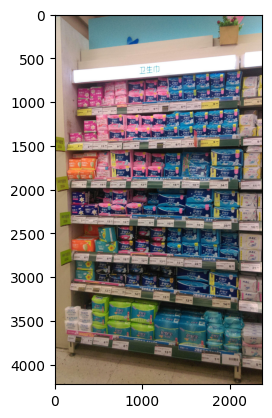

In [7]:
img = cv2.imread("data/test_1004_jpg.rf.jpg")
torgb = lambda img: cv2.cvtColor(img ,cv2.COLOR_BGR2RGB)
plt.imshow(torgb(img))

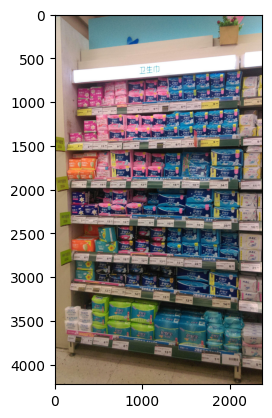

In [8]:
def detect_shelves(img):
    results=model(img)
    shelves=results[0].obb.xyxyxyxy
    shelv_objs=[shelv_data(shelv) for shelv in shelves]
    return shelv_objs


img = cv2.imread("data/test_1004_jpg.rf.jpg")

plt.imshow(torgb(img))

In [9]:
results = model(img)


0: 128x96 None254.2ms
Speed: 2.3ms preprocess, 254.2ms inference, 344.5ms postprocess per image at shape (1, 3, 128, 96)


In [10]:
boxes = results[0].obb.xyxyxyxy
boxes.shape

torch.Size([7, 4, 2])

In [11]:
shelves = boxes

In [12]:
shelv =boxes[0]
shelv.numpy().astype(np.int32)

array([[ 121, 2011],
       [2379, 2005],
       [2377, 1498],
       [ 120, 1504]], dtype=int32)

In [13]:
def draw_shelv(img, shelv):

    shelv_int = shelv.numpy().astype(np.int32)  # Convert to integer coordinates
    cv2.polylines(img, [shelv_int], isClosed=True, color=(255, 255, 255), thickness=31)

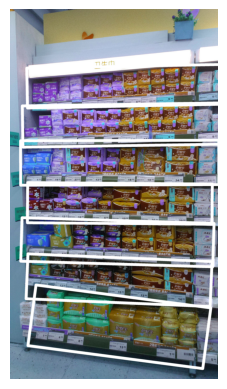

In [14]:
img_copy = img.copy()
for shelv in shelves:
        draw_shelv(img_copy, shelv)
    
    # Display the result
plt.imshow(img_copy)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
class shelv_data:
    def _init_(self,box):
        box_int = box.numpy().astype(np.int32)
        self.p1 = box_int[0]
        self.p2 = box_int[1]
        self.p3 = box_int[2]
        self.p4 = box_int[3]

In [ ]:
[shelv_data(shelv) for shelv in shelves]